In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lizard
import py2cfg
from py2cfg import CFGBuilder
from collections import Counter
import pandas as pd
import seaborn as sns
import os, sys
from pprint import pprint
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
df = pd.read_csv("./rich_results/commits_info.csv")
df

,old_file_path,new_file_path,commit_SHA,parent_commit_SHA,commit_message,diff_histogram,source_code_old,source_code_new,old_file_MCC,new_file_MCC
0,rich/markdown.py,rich/markdown.py,640c8902abfd791ec82c104e903ca6c7351e8336,22e70f051a86f828820d9fe5c861dcd715796d4d,"Some renaming, removing unused code","{'added': [(24, ' def create(cls, markdown:...","from typing import Any, ClassVar, Dict, Iterab...","from typing import Any, ClassVar, Dict, Iterab...",104.0,105
1,rich/markdown.py,rich/markdown.py,0999b4044398c32f1dc268d96ef43e8d53e4fa78,640c8902abfd791ec82c104e903ca6c7351e8336,Inline a closure that was no longer required,"{'added': [(568, ' text = t...","from typing import Any, ClassVar, Dict, Iterab...","from typing import Any, ClassVar, Dict, Iterab...",103.0,104
2,rich/text.py,rich/text.py,15c41e7d7acc6a9c5546a56d73fe0e9971aefae1,0999b4044398c32f1dc268d96ef43e8d53e4fa78,Un-fstring a string that shouldnt be an fstring,"{'added': [(906, ' raise TypeError(...","import re\nfrom functools import partial, redu...","import re\nfrom functools import partial, redu...",229.0,229
3,rich/default_styles.py,rich/default_styles.py,4760190e847a59194a48d78eb9b14877318d5c1b,15c41e7d7acc6a9c5546a56d73fe0e9971aefae1,"Remove mapping of tag to style names, just add...","{'added': [(141, ' ""markdown.em"": Style(ita...",from typing import Dict\n\nfrom .style import ...,from typing import Dict\n\nfrom .style import ...,0.0,0
4,rich/markdown.py,rich/markdown.py,4760190e847a59194a48d78eb9b14877318d5c1b,15c41e7d7acc6a9c5546a56d73fe0e9971aefae1,"Remove mapping of tag to style names, just add...","{'added': [(524, ' context....","from typing import Any, ClassVar, Dict, Iterab...","from typing import Any, ClassVar, Dict, Iterab...",102.0,103
...,...,...,...,...,...,...,...,...,...,...
470,rich/cells.py,rich/cells.py,9e7f363aebe01542210633dd4027ce777bf31e3c,afcc5c5a957c75b325fd7cc45bd70b3ac6413ef4,use sets,"{'added': [(8, '_SINGLE_CELLS = frozenset('), ...",from __future__ import annotations\n\nimport r...,from __future__ import annotations\n\nfrom fun...,27.0,27
471,rich/cells.py,rich/cells.py,46150cdbf61426c4683c59a0e4f45dca23d38202,9e7f363aebe01542210633dd4027ce777bf31e3c,sum and map is faster,"{'added': [(16, ''), (33, ' if _is_single_c...",from __future__ import annotations\n\nfrom fun...,from __future__ import annotations\n\nfrom fun...,27.0,27
472,rich/cells.py,rich/cells.py,6cef0bcb0e584eac1eb6021cc2202ecad70b6b11,46150cdbf61426c4683c59a0e4f45dca23d38202,leaner cell_len,"{'added': [(8, '# Ranges of unicode ordinals t...",from __future__ import annotations\n\nfrom fun...,from __future__ import annotations\n\nfrom fun...,28.0,27
473,rich/cells.py,rich/cells.py,aaaef278be38ebadea3d6f47dedd89fd910078ca,6cef0bcb0e584eac1eb6021cc2202ecad70b6b11,leaner syntax,"{'added': [(19, '_SINGLE_CELLS = frozenset('),...",from __future__ import annotations\n\nfrom fun...,from __future__ import annotations\n\nfrom fun...,26.0,28


In [7]:
print(df["source_code_old"][1])

from typing import Any, ClassVar, Dict, Iterable, List, Optional, Type, Union

from markdown_it import MarkdownIt
from markdown_it.token import Token

from . import box
from ._loop import loop_first
from ._stack import Stack
from .console import Console, ConsoleOptions, JustifyMethod, RenderResult
from .containers import Renderables
from .jupyter import JupyterMixin
from .panel import Panel
from .rule import Rule
from .segment import Segment
from .style import Style, StyleStack
from .syntax import Syntax
from .text import Text, TextType


class MarkdownElement:
    new_line: ClassVar[bool] = True

    @classmethod
    def create(cls, markdown: "Markdown", token: Any) -> "MarkdownElement":
        """Factory to create markdown element,

        Args:
            markdown (Markdown): The parent Markdown object.
            token (Any): A node from markdown-it.

        Returns:
            MarkdownElement: A new markdown element
        """
        return cls()

    def on_enter(self, co

In [8]:
print(df["source_code_new"][1])

from typing import Any, ClassVar, Dict, Iterable, List, Optional, Type, Union

from markdown_it import MarkdownIt
from markdown_it.token import Token

from . import box
from ._loop import loop_first
from ._stack import Stack
from .console import Console, ConsoleOptions, JustifyMethod, RenderResult
from .containers import Renderables
from .jupyter import JupyterMixin
from .panel import Panel
from .rule import Rule
from .segment import Segment
from .style import Style, StyleStack
from .syntax import Syntax
from .text import Text, TextType


class MarkdownElement:
    new_line: ClassVar[bool] = True

    @classmethod
    def create(cls, markdown: "Markdown", token: Any) -> "MarkdownElement":
        """Factory to create markdown element,

        Args:
            markdown (Markdown): The parent Markdown object.
            token (Any): A node from markdown-it.

        Returns:
            MarkdownElement: A new markdown element
        """
        return cls()

    def on_enter(self, co

In [7]:
analysis_old = lizard.analyze_file.analyze_source_code(df["old_file_path"][1], df["source_code_old"][1])
analysis_new = lizard.analyze_file.analyze_source_code(df["new_file_path"][1], df["source_code_new"][1])

In [13]:
analysis_old.function_list[0].__dict__

{'cyclomatic_complexity': 1,
 'nloc': 11,
 'token_count': 20,
 'name': 'create',
 'long_name': 'create( cls , markdown : "Markdown" , token : Any )',
 'start_line': 24,
 'end_line': 34,
 'full_parameters': ['cls', ' markdown : "Markdown"', ' token : Any'],
 'filename': 'rich/markdown.py',
 'top_nesting_level': 1,
 'fan_in': 0,
 'fan_out': 0,
 'general_fan_out': 0}

In [14]:
print(sum([f.cyclomatic_complexity for f in analysis_old.function_list]))
print(sum([f.cyclomatic_complexity for f in analysis_new.function_list]))

104
103


In [11]:
print(df["new_file_path"].value_counts().to_string())

new_file_path
rich/console.py                         36
rich/progress.py                        25
rich/pretty.py                          25
rich/markdown.py                        24
rich/text.py                            24
tests/test_console.py                   22
rich/traceback.py                       21
tests/test_pretty.py                    16
tests/test_markdown.py                  14
rich/syntax.py                          12
tests/test_text.py                      12
rich/cells.py                           12
rich/segment.py                         12
tests/test_syntax.py                    11
tests/test_segment.py                   10
rich/_null_file.py                       8
rich/table.py                            7
tests/test_highlighter.py                7
tests/test_progress.py                   7
tests/test_traceback.py                  7
rich/default_styles.py                   7
rich/panel.py                            7
tests/test_markdown_no_hyperlinks.py    

Top 3 frequently changed files:
 new_file_path
rich/console.py           36
rich/progress.py          25
rich/pretty.py            25
rich/markdown.py          24
rich/text.py              24
tests/test_console.py     22
rich/traceback.py         21
tests/test_pretty.py      16
tests/test_markdown.py    14
rich/syntax.py            12
Name: count, dtype: int64



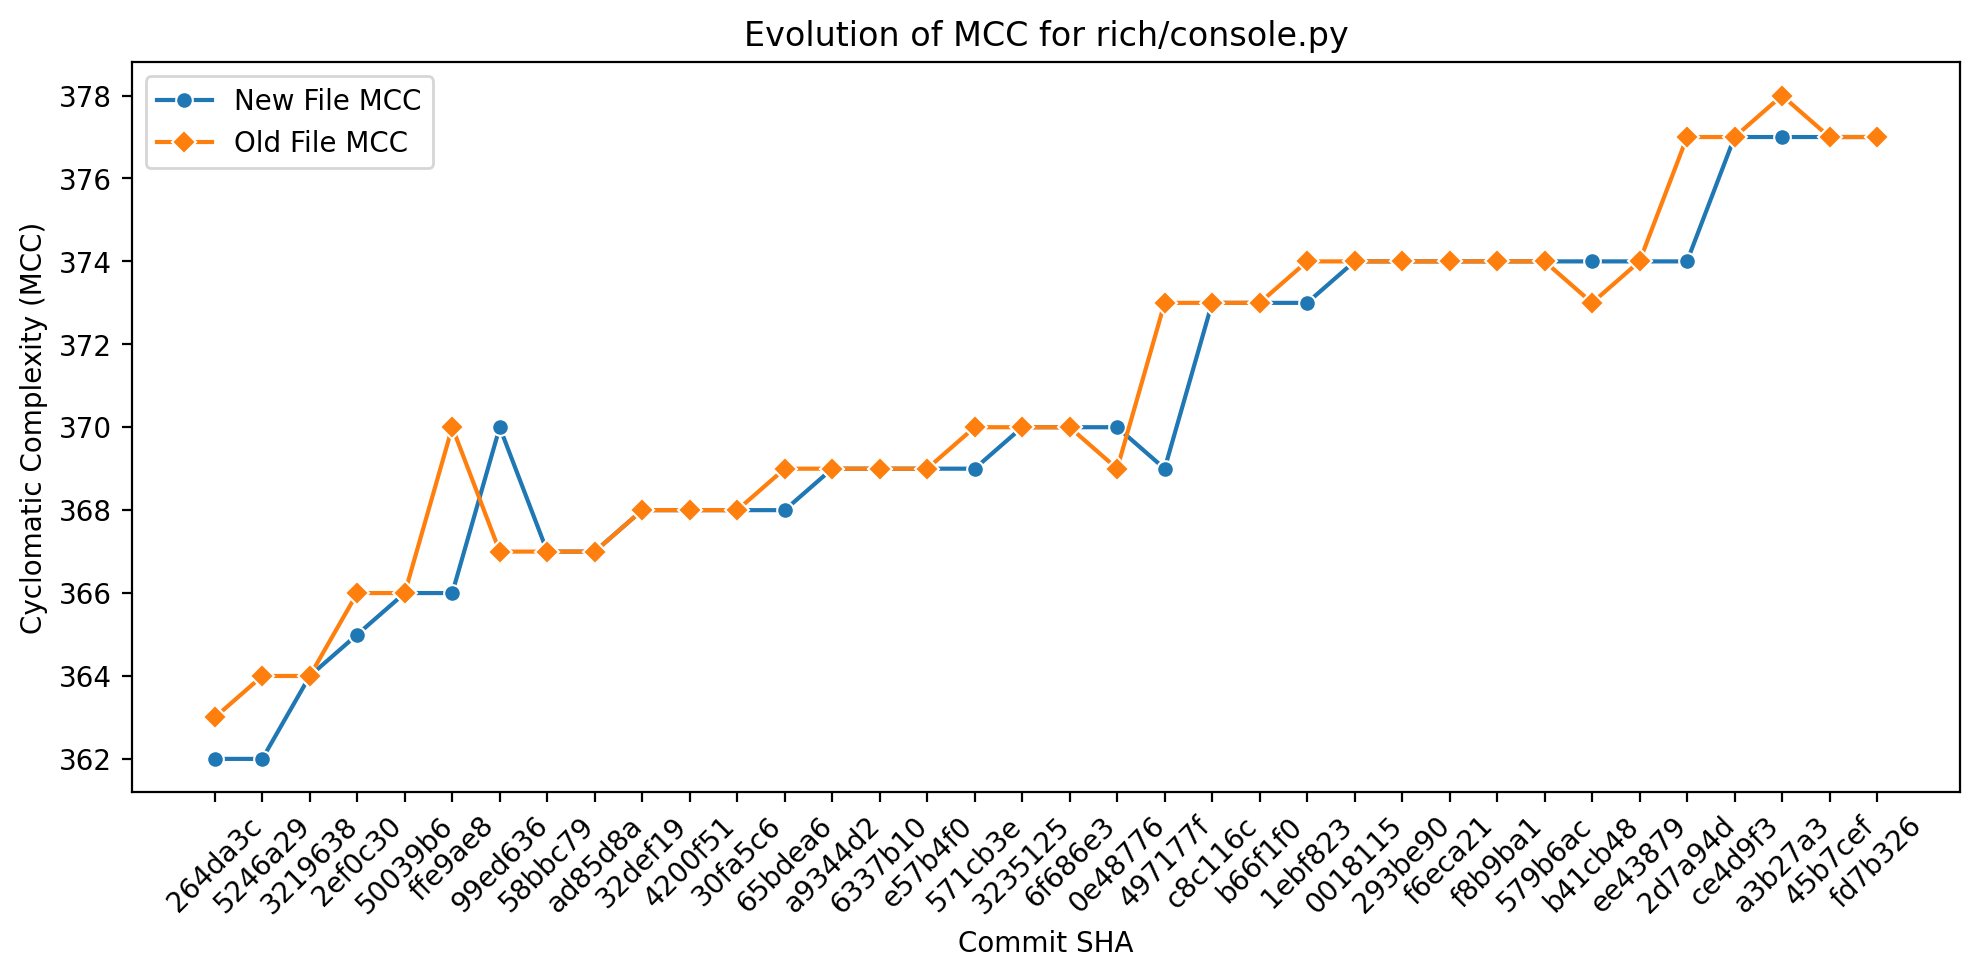

In [10]:
file_change_counts = df["new_file_path"].value_counts()
top_3_files = file_change_counts.head(10)
print("Top 3 frequently changed files:\n", top_3_files, end="\n\n")

most_changed_py_file = top_3_files.index[0]

df_filtered = df[df["new_file_path"] == most_changed_py_file].copy()
df_filtered.loc[:, "short_commit_SHA"] = df_filtered["commit_SHA"].apply(lambda x: x[:7])

plt.figure(figsize=(10, 5))
sns.lineplot(x=df_filtered["short_commit_SHA"], y=df_filtered["new_file_MCC"], label="New File MCC", marker='o')
sns.lineplot(x=df_filtered["short_commit_SHA"], y=df_filtered["old_file_MCC"], label="Old File MCC", marker='D')

most_changed_py_file = top_3_files.index[0]
plt.xticks(rotation=45)
plt.xlabel("Commit SHA")
plt.ylabel("Cyclomatic Complexity (MCC)")
plt.title(f"Evolution of MCC for {most_changed_py_file}")
plt.legend()
plt.tight_layout()

plt.savefig("rich_results/mcc_timeline.png", dpi=600)
plt.show()

In [12]:
cfg_output_dir = f"./rich_results/cfg_images/"
os.makedirs(cfg_output_dir, exist_ok=True)
most_changed_py_file = "tests/test_ansi.py"
df_filtered_new = df[df["new_file_path"] == most_changed_py_file].copy()
df_filtered_new.loc[:, "short_commit_SHA"] = df_filtered["commit_SHA"].apply(lambda x: x[:7])
count = 0
for idx, row in df_filtered_new.iterrows():
    commit_hash = row["short_commit_SHA"]
    source_code = row["source_code_new"]

    if pd.isna(source_code) or not isinstance(source_code, str) or source_code.strip() == "":
        print(f"Skipping {commit_hash}: Empty or invalid source code.")
        continue

    try:
        cfg_builder = CFGBuilder().build_from_src("progress", source_code)
        save_path = cfg_output_dir + str(count)
        cfg_builder.build_visual(save_path, "pdf", show = False)
        count += 1

    except AttributeError as e:
        print(f"AttributeError generating CFG for {commit_hash}: {e}")
    except SyntaxError:
        print(f"SyntaxError: Invalid Python code in {commit_hash}, skipping.")
    except Exception as e:
        print(f"Error generating CFG for {commit_hash}: {e}")

print(f"Generated {count} CFG images in {cfg_output_dir}")

Generated 4 CFG images in ./rich_results/cfg_images/


In [10]:
cfg_builder = CFGBuilder().build_from_file("theme", "./rich/rich/progress.py")
cfg_builder.build_visual('exampleCFG', 'pdf')

'exampleCFG.pdf'

In [13]:
cfg_builder = CFGBuilder().build_from_file("theme", "./rich/rich/syntax.py")
cfg_builder.build_visual('syntax', 'pdf', show=False)

'syntax.pdf'

In [3]:
cfg_builder = CFGBuilder().build_from_file("theme", "./rich/rich/logging.py")
cfg_builder.build_visual('logging', 'pdf', show=False)

'logging.pdf'

In [5]:
cfg_builder = CFGBuilder().build_from_file("theme", "./main.py")
cfg_builder.build_visual('mainPy', 'pdf', show=False)

'mainPy.pdf'